# INFO 1998: Final Project
# Exploring and Modelling Spotify Track Data
- Lauren Sutioso (las542)
- Jiye Baek (jb2438)
- Saumya Vashishtha (sv356)

For this project, we will be exploring a large dataset from the Spotify API. It contains around 232 thousand songs from over 26 genres along with data on their popularity and song attributes.


The link to the dataset is given below:
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

***INITIAL HYPOTHESIS***: we can predict the popularity of a song using its genre and song attributes.

## About the data

The content of this dataset can quickly get overwhelminng both due to the size of the dataset and the sheer number of features each track has.
We have simplified the meaning and the context of the information the Spotify WebAPI provides for each of the tracks in this dataset.

In [62]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style='darkgrid',rc={'axes.edgecolor': 'black'})

In [63]:
df = pd.read_csv('SpotifyFeatures.csv').dropna()

In [64]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [65]:
#gathering general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

- The `track_id` of each song is a string that acts as the unique identifier for that song in the Spotify songbase.
- The `artist_name`, `track_name`, and `genre` are self-explanatory. They are strings which are also identifiers of the tracks.


The vast majority of the features are the things Spotify calls 'song attributes' which are qualitiative and musical measures for each song which give a general and trimmed summary of the song's *feel*.
These song attributes are usually self-explanatory but there are some interesting ones. Learning about these could help us interpret the data better.

- `popularity` is defined as an integer from 0 to 100, it has no intermediate values between two ints, which means that the curves for this will have jumps from value to value, and will have multiple clusters. 
- `valence` of a track is a float64 type from 0.0 to 1.0 which conveys the 'musical positiveness' of a song. Higher values represent more energetic and upbeat songs while lower values represent more depressed and moody songs.
- Most other song-attributes are floats from 0.0 to 1.0 representing qualitative and subjective values like `danceability` and `energy` of a track and can be interpreted very easily.


## Exploration:

Now that we have a general idea of all the features of the data set, we can start to look around and see the patterns and relationships it may have with its 

In [66]:
pop = pd.DataFrame(df["popularity"])
aco = pd.DataFrame(df["acousticness"])
dan = pd.DataFrame(df["danceability"])
dur = pd.DataFrame(df["duration_ms"])
ene = pd.DataFrame(df["energy"])
lou = pd.DataFrame(df["loudness"])
#Added
ins = pd.DataFrame(df["instrumentalness"])
liv = pd.DataFrame(df["liveness"])
spe = pd.DataFrame(df["speechiness"])
tem = pd.DataFrame(df["tempo"])
val = pd.DataFrame(df["valence"])
gen = pd.DataFrame(df["genre"])

One of the most important feature that's discernible to humans and important to us the most has to be the `popularity` of a song. The column contains Spotify's own popularity measure which classifies a song's popularity on a scale of 0 to 100. They are integer values and so we will expect the data to have jumps in it as if it were a classification dataset with a 100 categories. The relationship of each genre will be plotted at once. Below are graphs which show the relationships between song attributes and popularity.

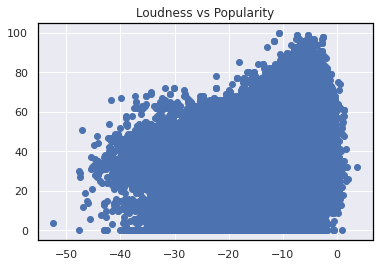

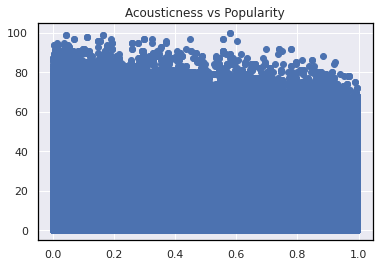

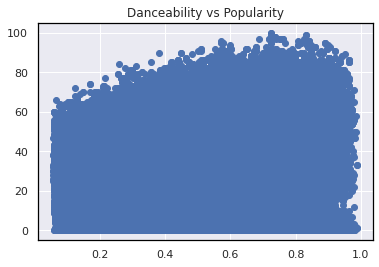

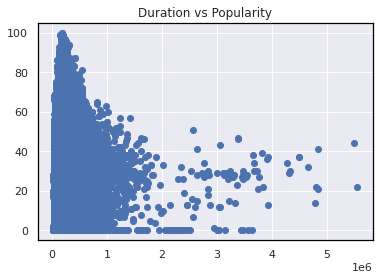

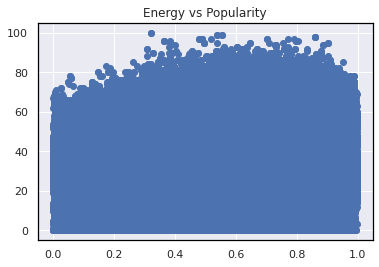

In [67]:
plt.scatter(lou, pop)
plt.title('Loudness vs Popularity'); plt.show()
plt.scatter(aco, pop)
plt.title('Acousticness vs Popularity'); plt.show()
plt.scatter(dan, pop)
plt.title('Danceability vs Popularity'); plt.show()
plt.scatter(dur, pop)
plt.title('Duration vs Popularity'); plt.show()
plt.scatter(ene, pop)
plt.title('Energy vs Popularity'); plt.show()

First thing we see here is that the area of the range of popularity is almost entirely filled. This can just be because of the sheer volume of data points we have which are over 232000. The size of each dot fills in the area and looks as if its a fully continuous stream. In actuality the points are huddled around discrete integer values which are close by, in a sense forming layers of songs with the same popularity to create an integrated area. However, we can still see some vague trends at the top boundaries of these shapes the data creates.

---

**Loudness** of a song seems to have a positive correlation with its popularity, which makes sense because a louder and more boistrous track would most likely be played regularly at celebrations and parties, making it popular, while duller and mellow tracks would appeal less to the masses. The same logic would apply to **Energy** and **Danceability**.

**Acousticness** represents how rich and full the production of a song is in terms of its intruments and complexity. Higher complexity would mean a lower acousticness and vice versa. So naturally this has a negative correlation with popularity since more sparse and bare tracks would be less interesting and less popular.

**Duration** is interesting because it seems similar to a curve with a somewhat exponential decay relation to popularity. Which makes sense as the attention span of the listeners remains more or less the same after a certain point. Everyone would get bored of a song that's 10 minutes long and wouldn't listen to it again and again, decreasing its popularity. 

---


Just to confirm that the data is in fact discrete when zoomed in, we can plot a small section of the data and create the same plots (with all genres mixed up).
These graphs are shown below


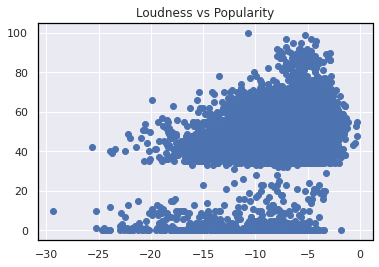

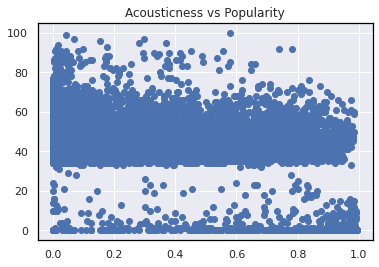

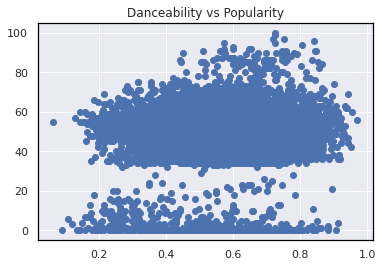

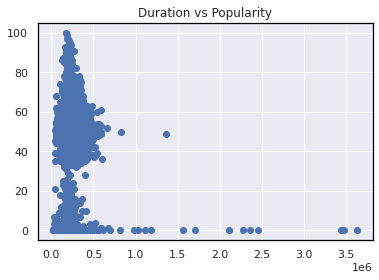

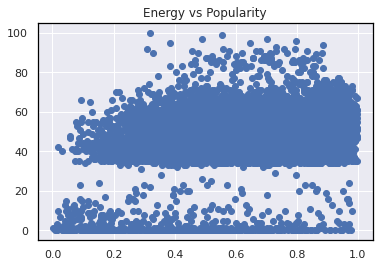

In [68]:
#trying the same with initial 10000 values
pop = pd.DataFrame(df["popularity"][0:10000])
aco = pd.DataFrame(df["acousticness"][0:10000])
dan = pd.DataFrame(df["danceability"][0:10000])
dur = pd.DataFrame(df["duration_ms"][0:10000])
ene = pd.DataFrame(df["energy"][0:10000])
lou = pd.DataFrame(df["loudness"][0:10000])
#Added
ins = pd.DataFrame(df["instrumentalness"][0:10000])
liv = pd.DataFrame(df["liveness"][0:10000])
spe = pd.DataFrame(df["speechiness"][0:10000])
tem = pd.DataFrame(df["tempo"][0:10000])
val = pd.DataFrame(df["valence"][0:10000])
gen = pd.DataFrame(df["genre"][0:10000])

plt.scatter(lou, pop)
plt.title('Loudness vs Popularity'); plt.show()
plt.scatter(aco, pop)
plt.title('Acousticness vs Popularity'); plt.show()
plt.scatter(dan, pop)
plt.title('Danceability vs Popularity'); plt.show()
plt.scatter(dur, pop)
plt.title('Duration vs Popularity'); plt.show()
plt.scatter(ene, pop)
plt.title('Energy vs Popularity'); plt.show()

We can see there are discrete jumps in the data and clusters around some numbers, as expected. 

We can even try this with a specific genre, for example the Dance genre, and we can see that the genre of a song determines its popularity more than any other song attribute. And a particular song attribute for a genre is going to be very similar across the board because song attributes are essentially what CREATE the difference between genres.

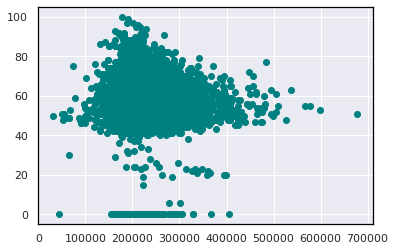

In [69]:
dancedf = df[df['genre']=='Dance']
plt.scatter(dancedf['duration_ms'], dancedf['popularity'], color='teal')

As expected, we can see that the duration vs popularity plot for a specific genre would simply form a cluster. We have seen this is true if we do this for each song attribute of a genre (by examination), it will form a cluster and NOT a trend of any algebraic type. This is why we need to alter hypothesis we asked initially, essentially flipping it around.

The ***HYPOTHESIS*** now simply becomes that we can categorize song genres on the basis of the distribution of their song-attributes. And we can categorize genres based on their popularity distributions.

---

## Splitting the data for processing

Here we just create a bunch of split datasets based on genres and their individual song attributes. Mostly for visualizations only.

In [70]:
#Genre: Movie

#Popularity
movie_pop = []

#Acousticness
movie_aco = []

#Danceability
movie_dan = []

#Duration
movie_dur = []

#Energy
movie_ene = []

#Instrumentalness
movie_ins = []

#Liveness
movie_liv = []

#Loudness
movie_lou = []

#Speechiness
movie_spe = []

#Tempo
movie_tem = []

#Valence
movie_val = []

for i in range(10000):
    if gen["genre"][i] == "Movie":
        movie_pop.append(pop["popularity"][i])
        movie_aco.append(aco["acousticness"][i])
        movie_dan.append(dan["danceability"][i])
        movie_dur.append(dur["duration_ms"][i])
        movie_ene.append(ene["energy"][i])
        movie_ins.append(ins["instrumentalness"][i])
        movie_liv.append(liv["liveness"][i])
        movie_lou.append(lou["loudness"][i])
        movie_spe.append(spe["speechiness"][i])
        movie_tem.append(tem["tempo"][i])
        movie_val.append(val["valence"][i])    

In [71]:
#Genre: Alternative

#Popularity
alt_pop = []

#Acousticness
alt_aco = []

#Danceability
alt_dan = []

#Duration
alt_dur = []

#Energy
alt_ene = []

#Instrumentalness
alt_ins = []

#Liveness
alt_liv = []

#Loudness
alt_lou = []

#Speechiness
alt_spe = []

#Tempo
alt_tem = []

#Valence
alt_val = []

for i in range(10000):
    if gen["genre"][i] == "Alternative":
        alt_pop.append(pop["popularity"][i])
        alt_aco.append(aco["acousticness"][i])
        alt_dan.append(dan["danceability"][i])
        alt_dur.append(dur["duration_ms"][i])
        alt_ene.append(ene["energy"][i])
        alt_ins.append(ins["instrumentalness"][i])
        alt_liv.append(liv["liveness"][i])
        alt_lou.append(lou["loudness"][i])
        alt_spe.append(spe["speechiness"][i])
        alt_tem.append(tem["tempo"][i])
        alt_val.append(val["valence"][i])        

In [72]:
#Genre: Country

#Popularity
con_pop = []

#Acousticness
con_aco = []

#Danceability
con_dan = []

#Duration
con_dur = []

#Energy
con_ene = []

#Instrumentalness
con_ins = []

#Liveness
con_liv = []

#Loudness
con_lou = []

#Speechiness
con_spe = []

#Tempo
con_tem = []

#Valence
con_val = []

for i in range(10000):
    if gen["genre"][i] == "Country":
        con_pop.append(pop["popularity"][i])
        con_aco.append(aco["acousticness"][i])
        con_dan.append(dan["danceability"][i])
        con_dur.append(dur["duration_ms"][i])
        con_ene.append(ene["energy"][i])
        con_ins.append(ins["instrumentalness"][i])
        con_liv.append(liv["liveness"][i])
        con_lou.append(lou["loudness"][i])
        con_spe.append(spe["speechiness"][i])
        con_tem.append(tem["tempo"][i])
        con_val.append(val["valence"][i])        

In [73]:
#Genre: A Capella

#Popularity
aca_pop = []

#Acousticness
aca_aco = []

#Danceability
aca_dan = []

#Duration
aca_dur = []

#Energy
aca_ene = []

#Instrumentalness
aca_ins = []

#Liveness
aca_liv = []

#Loudness
aca_lou = []

#Speechiness
aca_spe = []

#Tempo
aca_tem = []

#Valence
aca_val = []

for i in range(10000):
    if gen["genre"][i] == "A Capella":
        aca_pop.append(pop["popularity"][i])
        aca_aco.append(aco["acousticness"][i])
        aca_dan.append(dan["danceability"][i])
        aca_dur.append(dur["duration_ms"][i])
        aca_ene.append(ene["energy"][i])
        aca_ins.append(ins["instrumentalness"][i])
        aca_liv.append(liv["liveness"][i])
        aca_lou.append(lou["loudness"][i])
        aca_spe.append(spe["speechiness"][i])
        aca_tem.append(tem["tempo"][i])
        aca_val.append(val["valence"][i])        

In [74]:
#Genre: Dance

#Popularity
dan_pop = []

#Acousticness
dan_aco = []

#Danceability
dan_dan = []

#Duration
dan_dur = []

#Energy
dan_ene = []

#Instrumentalness
dan_ins = []

#Liveness
dan_liv = []

#Loudness
dan_lou = []

#Speechiness
dan_spe = []

#Tempo
dan_tem = []

#Valence
dan_val = []

for i in range(10000):
    if gen["genre"][i] == "Dance":
        dan_pop.append(pop["popularity"][i])
        dan_aco.append(aco["acousticness"][i])
        dan_dan.append(dan["danceability"][i])
        dan_dur.append(dur["duration_ms"][i])
        dan_ene.append(ene["energy"][i])
        dan_ins.append(ins["instrumentalness"][i])
        dan_liv.append(liv["liveness"][i])
        dan_lou.append(lou["loudness"][i])
        dan_spe.append(spe["speechiness"][i])
        dan_tem.append(tem["tempo"][i])
        dan_val.append(val["valence"][i])        

In [75]:
#Genre: R&B

#Popularity
rnb_pop = []

#Acousticness
rnb_aco = []

#Danceability
rnb_dan = []

#Duration
rnb_dur = []

#Energy
rnb_ene = []

#Instrumentalness
rnb_ins = []

#Liveness
rnb_liv = []

#Loudness
rnb_lou = []

#Speechiness
rnb_spe = []

#Tempo
rnb_tem = []

#Valence
rnb_val = []

for i in range(10000):
    if gen["genre"][i] == "R&B":
        rnb_pop.append(pop["popularity"][i])
        rnb_aco.append(aco["acousticness"][i])
        rnb_dan.append(dan["danceability"][i])
        rnb_dur.append(dur["duration_ms"][i])
        rnb_ene.append(ene["energy"][i])
        rnb_ins.append(ins["instrumentalness"][i])
        rnb_liv.append(liv["liveness"][i])
        rnb_lou.append(lou["loudness"][i])
        rnb_spe.append(spe["speechiness"][i])
        rnb_tem.append(tem["tempo"][i])
        rnb_val.append(val["valence"][i])        

## Meaningful Visualizations

There were only two main visuals required for this assignment but only two weren't sufficient to get an idea of the dataset because its too large. All the visualisations are shown below.

### Correlation Heatmap

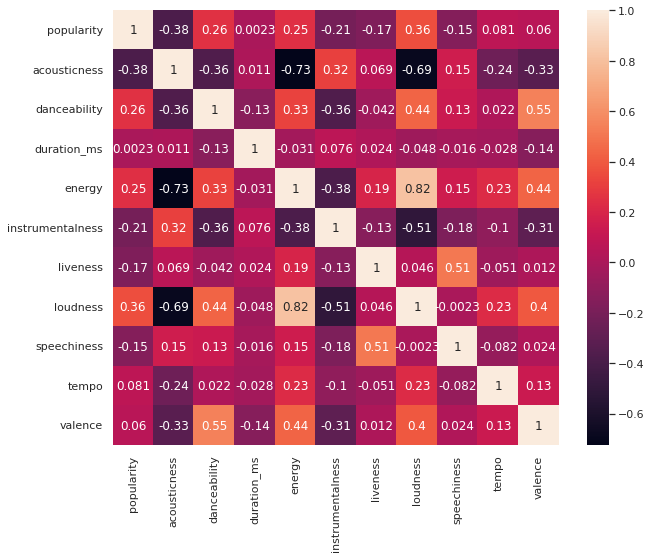

In [76]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

Our first visualization is a heatmap that shows the correlation of various song features to each other. Energy and loudness have the strongest correlation, at 0.82. However, features tend not to have a strong correlation to one another, as the correlation coefficients tend to be below 0.6. These numbers are too low to determine relationships between.  

Perhaps there could be another way to determine patterns between features.

### Song Attribute Density Plots
Since the dataset consists of 27 genres, displaying all of them on graphs would yield little to no valuable insight, so we have instead chosen a few features at random to show trends which apply to the rest of the genres too:

In [77]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

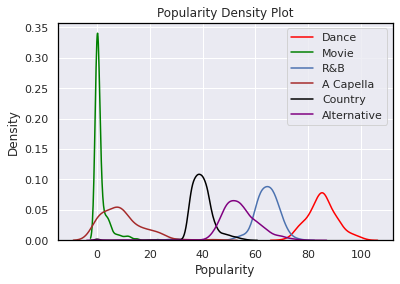

In [78]:
#Compute density plots for popularity by each genre
density = sns.kdeplot(dan_pop, color = "red")
density = sns.kdeplot(movie_pop, color = "green")
density = sns.kdeplot(rnb_pop)
density = sns.kdeplot(aca_pop, color = "brown")
density = sns.kdeplot(con_pop, color = "black")
density = sns.kdeplot(alt_pop, color = "purple")
plt.title("Popularity Density Plot")
plt.xlabel("Popularity")
plt.legend(labels = ["Dance", "Movie", "R&B", "A Capella", "Country", "Alternative"])
plt.show()

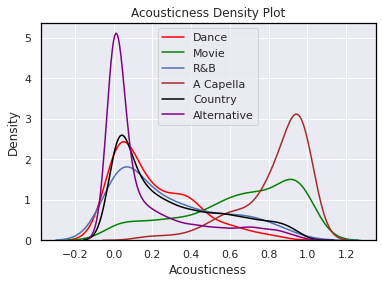

In [79]:
#Compute density plots for acousticness by each genre
density = sns.kdeplot(dan_aco, color = "red")
density = sns.kdeplot(movie_aco, color = "green")
density = sns.kdeplot(rnb_aco)
density = sns.kdeplot(aca_aco, color = "brown")
density = sns.kdeplot(con_aco, color = "black")
density = sns.kdeplot(alt_aco, color = "purple")
plt.title("Acousticness Density Plot")
plt.xlabel("Acousticness")
plt.legend(labels = ["Dance", "Movie", "R&B", "A Capella", "Country", "Alternative"])
plt.show()

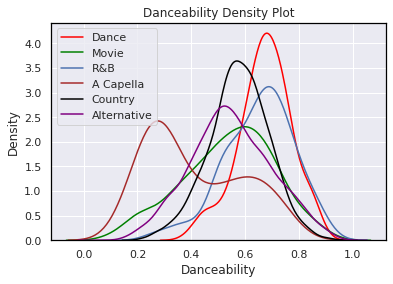

In [80]:
#Compute density plots for danceability by each genre
density = sns.kdeplot(dan_dan, color = "red")
density = sns.kdeplot(movie_dan, color = "green")
density = sns.kdeplot(rnb_dan)
density = sns.kdeplot(aca_dan, color = "brown")
density = sns.kdeplot(con_dan, color = "black")
density = sns.kdeplot(alt_dan, color = "purple")
plt.title("Danceability Density Plot")
plt.xlabel("Danceability")
plt.legend(labels = ["Dance", "Movie", "R&B", "A Capella", "Country", "Alternative"])
plt.show()

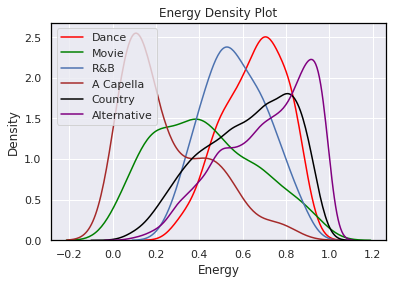

In [81]:
#Compute density plots for energy by each genre
density = sns.kdeplot(dan_ene, color = "red")
density = sns.kdeplot(movie_ene, color = "green")
density = sns.kdeplot(rnb_ene)
density = sns.kdeplot(aca_ene, color = "brown")
density = sns.kdeplot(con_ene, color = "black")
density = sns.kdeplot(alt_ene, color = "purple")
plt.title("Energy Density Plot")
plt.xlabel("Energy")
plt.legend(labels = ["Dance", "Movie", "R&B", "A Capella", "Country", "Alternative"])
plt.show()

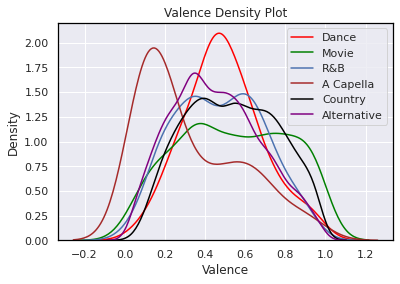

In [82]:
#Compute density plots for valence by each genre
density = sns.kdeplot(dan_val, color = "red")
density = sns.kdeplot(movie_val, color = "green")
density = sns.kdeplot(rnb_val)
density = sns.kdeplot(aca_val, color = "brown")
density = sns.kdeplot(con_val, color = "black")
density = sns.kdeplot(alt_val, color = "purple")
plt.title("Valence Density Plot")
plt.xlabel("Valence")
plt.legend(labels = ["Dance", "Movie", "R&B", "A Capella", "Country", "Alternative"])
plt.show()

### Popularity Density for All Genres:

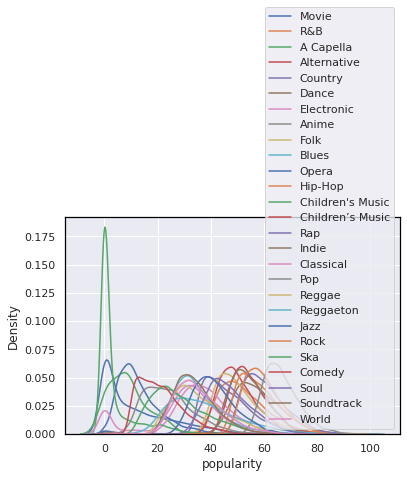

In [83]:
genres = df['genre'].unique()
gen_name = []

for i in genres:
  gendf = df[df['genre']==i]
  sns.kdeplot(gendf['popularity'])
  gen_name.append(i)

plt.legend(labels = gen_name)

### Scatterplots for 'energy' vs 'popularity for some genres:

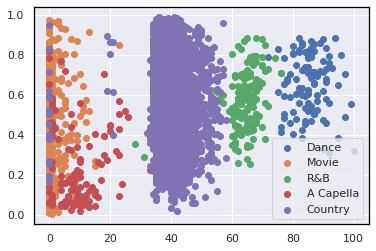

In [84]:
#Compute Scatter Plot for Popularity over Energy for each genre
plt.scatter(dan_pop, dan_ene)
plt.scatter(movie_pop, movie_ene)
plt.scatter(rnb_pop, rnb_ene)
plt.scatter(aca_pop, aca_ene)
#plt.scatter(alt_pop, alt_ene)
plt.scatter(con_pop, con_ene)
plt.legend(labels = ["Dance", "Movie", "R&B", "A Capella", "Country", "Alternative"])

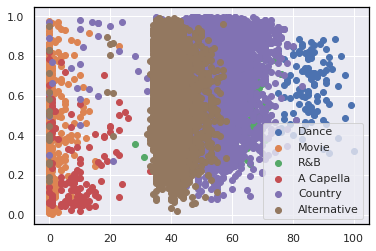

In [85]:
plt.scatter(dan_pop, dan_ene)
plt.scatter(movie_pop, movie_ene)
plt.scatter(rnb_pop, rnb_ene)
plt.scatter(aca_pop, aca_ene)
plt.scatter(alt_pop, alt_ene)
plt.scatter(con_pop, con_ene)
plt.legend(labels = ["Dance", "Movie", "R&B", "A Capella", "Country", "Alternative"])

##Models:

Since the scatterplot above for `energy` vs `popularity` of a handful of genres showed a lot of overlap between the data clusters and them being much more sparse and scattered, we figured a decision tree classifier might work better than just a normal k-nearest-neighbours classifier.
It's only problems may be overfitting but finding an optimum max_depth would solve this issue. 


This *key point* in creating models with this data would be that the accuracy of the model may differ depending on the song-attribute and the genres a person wants to create a model **for**.

This is simply because of a property of the data—musical genres tend to have a lot of overlap in terms of their attributes. Some are literally derived from others and thus WILL have overlap and similarity in terms of some of their attributes. The acousticness density plot above clearly illustrated that. The multiple density curves cleanly divided into two parts, where there were overlapping peaks for **more acoustic genres** like country, children's music, etc. and those for **less acoustic ones** like most modern hiphop or trap music.

This should be kept in mind while evaluating the train and test accuracies.

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

### Decision Tree Classifier

In [87]:
#creating a dataset with only the genres we want to create a model for.
df_learn = pd.DataFrame()
for i in ['Dance','Movie','R&B','A Capella','Country']:
  df1 = df[df['genre']==i]
  df_learn = pd.concat((df_learn,df1))

df_learn['genre'].unique()

array(['Dance', 'Movie', 'R&B', 'A Capella', 'Country'], dtype=object)

In [88]:
#creating the training datasets and doing the train-test-split
#training for multiple song-attributes
features = ['popularity', 'energy', 'danceability', 'acousticness', 'loudness', 'duration_ms', 'speechiness', 'tempo']
X = df_learn[features]
Y = df_learn['genre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1998)
dtree = DecisionTreeClassifier(max_depth = 10) #max_depth value here was chosen by a guess
dtree = dtree.fit(X_train, Y_train)

In [89]:
#evaluation of the model

dtree_pred_train = dtree.predict(X_train)
dtree_pred_test = dtree.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.7557702825888788
Test Accuracy:  0.6839725827621409


We used input features of popularity, energy, danceability, acousticness, loudness, duration in milliseconds, speechiness, tempo to predict the output target of genre. With a max_depth of 10, we were able to achieve a train accuracy of 0.76 and test accuracy of 0.68.

Text(0, 0.5, 'accuracy scores')

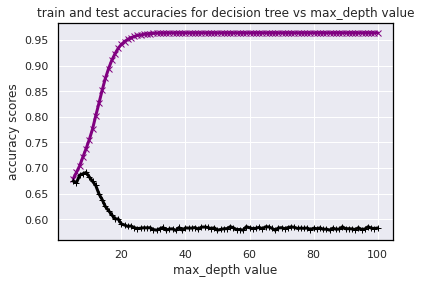

In [90]:
trainacc=[]
testacc=[]

for i in range(5,101):
  dtree = DecisionTreeClassifier(max_depth = i).fit(X_train, Y_train)
  dtree_pred_train = dtree.predict(X_train)
  dtree_pred_test = dtree.predict(X_test)
  trainacc.append(accuracy_score(Y_train, dtree_pred_train))
  testacc.append(accuracy_score(Y_test, dtree_pred_test))

plt.plot(range(5,101),trainacc,lw=3,marker='x',color='purple')
plt.plot(range(5,101),testacc,lw=3,marker='+',color='black')
plt.title('train and test accuracies for decision tree vs max_depth value')
plt.xlabel('max_depth value')
plt.ylabel('accuracy scores')

In [91]:
maxval=max(testacc)
maxind=list(range(5,101))[testacc.index(maxval)]
print(f'maximum value of test accuracy for decision tree classifier is {maxval} with max_depth of {maxind}.')

maximum value of test accuracy for decision tree classifier is 0.6915560740848767 with max_depth of 9.


This is not bad for something that's as subjective and difficult to predict as music. We can clearly see the convergence of train accuracy to 1.0 as the test accuracy lowers and max_depth increases though.

### K Nearest Neighbors Classifier

We can also evaluate how different the KNN model can be compared to the Decision Tree Classifier:

In [92]:
feature = df_learn[["popularity", "energy", "danceability", "acousticness", "valence"]]
target = df_learn["genre"]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)
model = KNeighborsClassifier(60) #chosen by a guess
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)

In [93]:
print('Test accuracy:',accuracy_score(predictions, target_test))

Test accuracy: 0.648971853580283


Text(0, 0.5, 'test accuracy')

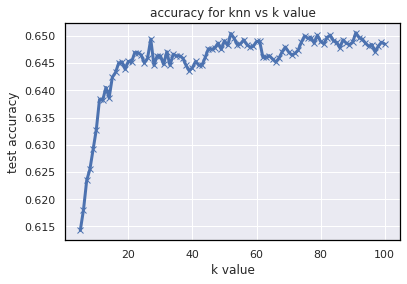

In [94]:
accuracies = []
for i in range(5,101):
  model = KNeighborsClassifier(i).fit(feature_train, target_train)
  predictions = model.predict(feature_test)
  accuracies.append(accuracy_score(predictions, target_test))

plt.plot(range(5,101),accuracies,lw=3,marker='x')
plt.title('accuracy for knn vs k value')
plt.xlabel('k value')
plt.ylabel('test accuracy')

In [95]:
maxval=max(accuracies)
maxind=list(range(5,101))[accuracies.index(maxval)]
print(f'maximum value of test accuracy for KNN classifier is {maxval} with k-value of {maxind}.')

maximum value of test accuracy for KNN classifier is 0.6505760536677847 with k-value of 91.


We used the input features of popularity, energy, danceability, acousticness, and valence to predict the output target of genre. With a k value of 60, we were able to achieve an accuracy score of 0.65.

## Generalised Models

Functions for KNN and DTree models for any given list of genres and song-attributes to train on.

In [96]:
def giveKNN(genres,atts,kval,size):
  '''
  Returns a KNN model trained for the given genres,attributes,and k value.
  Prints the test accuracy score too.

  genres: a LIST of strings which are the genres in the dataset 'df'.
  atts: a LIST of song-attributes from the dataset 'df'.
  kval: INT, the value of k for the KNN Classifier.
  size: FLOAT, test_size for the train test split.
  '''
  df_knn = pd.DataFrame()
  for i in genres:
    df1 = df[df['genre']==i]
    df_knn = pd.concat((df_knn,df1))

  feature = df_knn[atts]
  target = df_knn["genre"]

  feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = size, random_state = 42)
  model = KNeighborsClassifier(kval).fit(feature_train, target_train)

  print('Test accuracy is :',accuracy_score(model.predict(feature_test), target_test))

  return model

In [97]:
def giveDTree(genres,atts,depth,size):
  '''
  Returns a Decision Tree Classifier model trained for the given genres,attributes,and k value.
  Prints the test accuracy score too.
  
  genres: a LIST of strings which are the genres in the dataset 'df'.
  atts: a LIST of song-attributes from the dataset 'df'.
  depth: INT, the value of max_depth for the DecisionTreeClassifier
  size: FLOAT, test_size for the train test split.
  '''
  df_dtree = pd.DataFrame()
  for i in genres:
    df1 = df[df['genre']==i]
    df_dtree = pd.concat((df_dtree,df1))
  
  X = df_dtree[atts]
  Y = df_dtree['genre']

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = size, random_state = 1998)
  dtree = DecisionTreeClassifier(max_depth = depth).fit(X_train, Y_train)

  print("Test Accuracy is : ", accuracy_score(Y_test, dtree.predict(X_test)))
  
  return dtree

In [98]:
test1 = giveKNN(['Dance','Movie','R&B','A Capella','Country'],
                ["popularity", "energy", "danceability", "acousticness", "valence"],
                60,
                0.2)

Test accuracy is : 0.648971853580283


In [99]:
test2 = giveDTree(['Dance','Movie','R&B','A Capella','Country'],
                  ['popularity', 'energy', 'danceability', 'acousticness', 'loudness', 'duration_ms', 'speechiness', 'tempo'],
                  10,
                  0.2)

Test Accuracy is :  0.6839725827621409


## Conclusion:

After looking at both models, we can say that the decision tree model is definitely better. The reason is twofold:

- The model did better than the KNN classifier to categorise the genres based on the song-attribute and popularity at its optimum max_depth value. It had an accuracy score of 0.69 while the KNN model had an accuracy score of 0.65 at its optimum value.
- The decision tree model seems more stable to changes in its k value, and while this is not an inherent trait of the models themselves because as said in the data exploration, the data's spread is more erratic than just simple clusters not overalapping with each other. What we mean by stability is that an increase in max_depth produces a smooth and predictable change in the test accuracy, it increases -> reaches and optimum -> and decreases and tapers off after that. But this is mostly not the case for KNN because a change in the number of neigbours a centroid takes into consideration does not mean it'll only hit points of its own type (because the data's spread is very erratic), so for any increase in the value of k after a point, the graph just resembles random noise around a stable value with slight up and down jumps.

This is why we think decision trees are the better choice for categorising the genres on the basis of any specific list of song attributes.

And to generalise the models, we have written two functions above which return trained models for kNN and DecisionTrees trained for a specific list of genres and song attributes.

Further exploration of this dataset could be done by creating something like a recommender system function that returns a list of song recommendations from the spotify API given a list of songs you like as an input along with their attributes.

---